# plot Tremor removal

2023.3.17
- 2023.4.27 Update for the station with EADB

In [11]:
import datetime
import os
import time

from obspy import read, Stream, Trace

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.dates as mdates
import seaborn as sns 

%matplotlib inline

import numpy as np

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12
os.environ['TZ'] = 'GMT' # change time zone to avoid confusion in unix_tvec conversion


plt.rcParams["font.family"] = 'Arial'
# plt.rcParams["font.sans-serif"] = "DejaVu Sans, Arial, Helvetica, Lucida Grande, Verdana, Geneva, Lucid, Avant Garde, sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 5
plt.rcParams["xtick.major.width"] = 0.5
plt.rcParams["xtick.minor.size"] = 2
plt.rcParams["xtick.minor.width"] = 1
plt.rcParams["xtick.minor.visible"] = True


plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.major.size"] = 5
plt.rcParams["ytick.major.width"] = 0.5
plt.rcParams["ytick.minor.size"] = 2
plt.rcParams["ytick.minor.width"] = 1
plt.rcParams["ytick.minor.visible"] = True

In [12]:
# read sac data
fisacdir = "sac"
tr_raw = read(f"./{fisacdir}/*_raw.sac", format="SAC").merge()[0]
tr_kurtosis = read(f"./{fisacdir}/*_kurtosis.sac", format="SAC").merge()[0]
tr_stalta = read(f"./{fisacdir}/*_stalta.sac", format="SAC").merge()[0]
tr_removed = read(f"./{fisacdir}/*_removed.sac", format="SAC").merge()[0]

In [13]:
# # decimate for the sake of development of plots
# decimatefactor = 16
# tr_raw = read(f"./{fisacdir}/*_raw.sac", format="SAC").decimate(decimatefactor, no_filter=False, strict_length=False).merge()[0]
# tr_kurtosis = read(f"./{fisacdir}/*_kurtosis.sac", format="SAC").decimate(decimatefactor, no_filter=False, strict_length=False).merge()[0]
# tr_stalta = read(f"./{fisacdir}/*_stalta.sac", format="SAC").decimate(decimatefactor, no_filter=False, strict_length=False).merge()[0]
# tr_removed = read(f"./{fisacdir}/*_removed.sac", format="SAC").decimate(decimatefactor, no_filter=False, strict_length=False).merge()[0]

In [14]:
tvec=[datetime.datetime.fromtimestamp(ts) for ts in tr_raw.times("timestamp").data]

In [15]:
kurtosis_thresh = 3.0
stalta_thresh = 3.0

In [16]:
cpalette_lc=np.array(sns.color_palette("colorblind"))[:]


In [17]:
len(tvec)

1728001

In [ ]:
ylimit_noise=[-12, 12]

fig, axs = plt.subplots(4, 1, figsize=(8,7), sharex=True)

axs[0].plot(tvec, tr_raw.data*1e6, "k-", lw=0.5)
axs[0].set_ylabel("µm/s")
axs[0].set_ylim(ylimit_noise)

axs[1].plot(tvec, tr_kurtosis.data, "-", c=cpalette_lc[0], lw=0.5)
axs[1].set_ylabel("Kurtosis")
axs[1].set_ylim([0, 10])
axs[1].axhline(kurtosis_thresh, c="k", lw=1, ls="--")

axs[2].plot(tvec, tr_stalta.data, "-", c=cpalette_lc[2], lw=0.5)
axs[2].set_ylabel("STA/LTA")
axs[2].set_ylim([0, 5])
axs[2].axhline(stalta_thresh, c="k", lw=1, ls="--")

axs[3].plot(tvec, tr_removed.data*1e6, "-", c=cpalette_lc[3], lw=0.5)
axs[3].set_ylabel("µm/s")
axs[3].set_ylim(ylimit_noise)

# # format x label
xfmt = dates.DateFormatter('%Y-%m-%d\nT%H:%M:%S')
axs[3].xaxis.set_major_formatter(xfmt)
axs[3].xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 6, 12, 18]))
# axs[3].xaxis.set_major_locator(mdates.DayLocator(interval=1))
axs[3].xaxis.set_minor_locator(mdates.HourLocator(interval=3))
axs[3].set_xlim([tvec[0], tvec[-1]])
plt.setp(axs[3].get_xticklabels(), rotation=0, ha="center", rotation_mode="anchor")

for i in range(4):
    axs[i].grid(True, which="major", axis="both", lw=1, c="gray", alpha=0.5, zorder=-1)

plt.tight_layout()

fig.suptitle(f'{tr_raw.id} {tr_stalta.stats.starttime.strftime("%Y-%m-%dT%H:%M:%S")}-{tr_stalta.stats.endtime.strftime("%Y-%m-%dT%H:%M:%S")}', x=0.525)
fig.tight_layout(rect=[0,0,1,1.01])
plt.subplots_adjust(hspace=0.2)
fig.align_ylabels()

plt.text(-0.09, 1.0, '(a)', horizontalalignment='left', verticalalignment='center', transform = axs[0].transAxes, fontsize=13, fontweight="bold")
plt.text(-0.09, 1.0, '(b)', horizontalalignment='left', verticalalignment='center', transform = axs[1].transAxes, fontsize=13, fontweight="bold")
plt.text(-0.09, 1.0, '(c)', horizontalalignment='left', verticalalignment='center', transform = axs[2].transAxes, fontsize=13, fontweight="bold")
plt.text(-0.09, 1.0, '(d)', horizontalalignment='left', verticalalignment='center', transform = axs[3].transAxes, fontsize=13, fontweight="bold")


foname = (f"./figure/tremorremoved_{tr_raw.id}_{fisacdir}.png")
plt.savefig(foname, dpi=150)


# Plot some events

In [19]:
len(tvec)

1728001

(-12.0, 12.0)

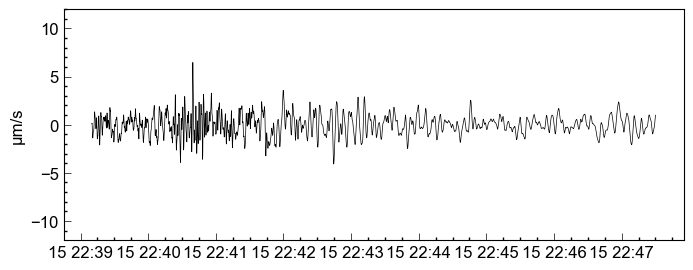

In [20]:
plottwinlen = 10000
plotst = 1631001

fig, ax = plt.subplots(1, 1, figsize=(8,3), sharex=True)

ax.plot(tvec[plotst:plotst+plottwinlen], tr_raw.data[plotst:plotst+plottwinlen]*1e6, "k-", lw=0.5)
ax.set_ylabel("µm/s")
ax.set_ylim(ylimit_noise)

